In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('C:\\Users\\Ryan\\Desktop\\ML\\train.csv')

In [3]:
train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [4]:
train.keys()

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [5]:
# I don't care about their names or ticket number
# Not sure just yet on cabin/embarked
del train['Name']
del train['Ticket']
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22,1,0,7.2500,NaN,S
1,2,1,1,female,38,1,0,71.2833,C85,C
2,3,1,3,female,26,0,0,7.9250,NaN,S
3,4,1,1,female,35,1,0,53.1000,C123,S
4,5,0,3,male,35,0,0,8.0500,NaN,S


In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train['Sex'].value_counts()

male      577
female    314
dtype: int64

In [8]:
train['Cabin'].value_counts().head() #long list

C23 C25 C27    4
G6             4
B96 B98        4
D              3
C22 C26        3
dtype: int64

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
dtype: int64

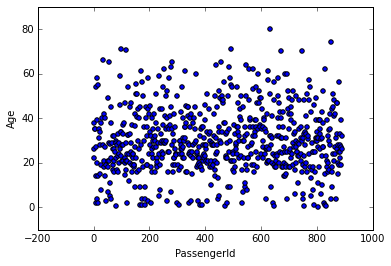

In [10]:
train.plot(x = 'PassengerId', y = 'Age', kind = 'scatter')

In [11]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

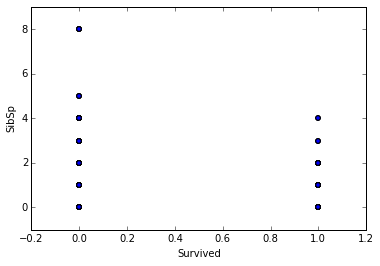

In [12]:
train.plot(x = 'Survived', y = 'SibSp', kind = 'scatter')  
# It looks like people were more likely to die if they had 5+ siblings/spouse on board.

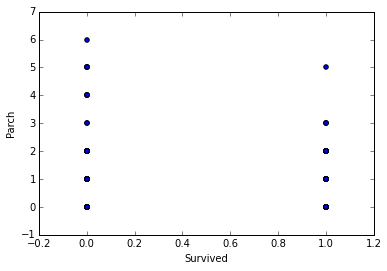

In [13]:
train.plot(x = 'Survived', y = 'Parch', kind = 'scatter')  
# It looks like people were more likely to die if they had 5+ siblings/spouse on board.

# GENDER MODEL

In [14]:
female_stats = train[train['Sex'] == 'female']
female_lived = np.sum(female_stats['Survived'] == 1)
female_died = np.sum(female_stats['Survived'] == 0)

In [15]:
female_survival = pd.Series((female_lived, female_died), name='')

In [16]:
female_survival

0    233
1     81
Name: , dtype: int64

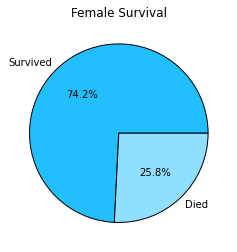

In [17]:
female_chart = female_survival.plot(kind='pie', title='Female Survival', labels=['Survived','Died'], colors=['#21BFFF','#90DFFF'], figsize=(4,4), autopct='%1.1f%%')
female_chart.set_aspect('equal')
fig_female = female_chart.get_figure()

In [18]:
male_stats = train[train['Sex'] == 'male']
male_lived = np.sum(male_stats['Survived'] == 1)
male_died = np.sum(male_stats['Survived'] == 0)

In [19]:
male_survival = pd.Series((male_lived, male_died), name = '')

In [20]:
male_survival

0    109
1    468
Name: , dtype: int64

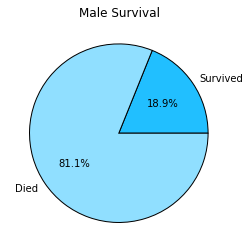

In [21]:
male_chart = male_survival.plot(kind='pie', title='Male Survival', labels=['Survived','Died'], colors=['#21BFFF','#90DFFF'], figsize=(4,4), autopct='%1.1f%%')
male_chart.set_aspect('equal')
fig_male = male_chart.get_figure()

In [22]:
ms = np.sum(train['Sex'] == 'male')
fs = np.sum(train['Sex'] == 'female')

In [23]:
ms, fs

(577, 314)

In [24]:
gender_stat = pd.Series((ms, fs), name = '')

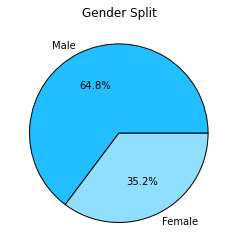

In [25]:
gender_chart = gender_stat.plot(kind='pie', title='Gender Split', labels=['Male', 'Female'],colors=['#21BFFF','#90DFFF'], figsize=(4,4), autopct='%1.1f%%')
gender_chart.set_aspect('equal')
fig_gen = gender_chart.get_figure()

# AGE MODEL

In [26]:
train['Age'].count() # some ages are missing

714

In [27]:
# I'll replace the missing ages with the median

In [28]:
train["Age"][np.isnan(train['Age'])].shape # 177 missing ages

(177L,)

In [29]:
pd.options.mode.chained_assignment = None # remove annoying chain warning

In [30]:
train['Age'][np.isnan(train['Age'])] = np.median(train['Age'])

In [31]:
train['Age'].count() # worked

891

In [32]:
import seaborn as sns # trying out stanford plotting

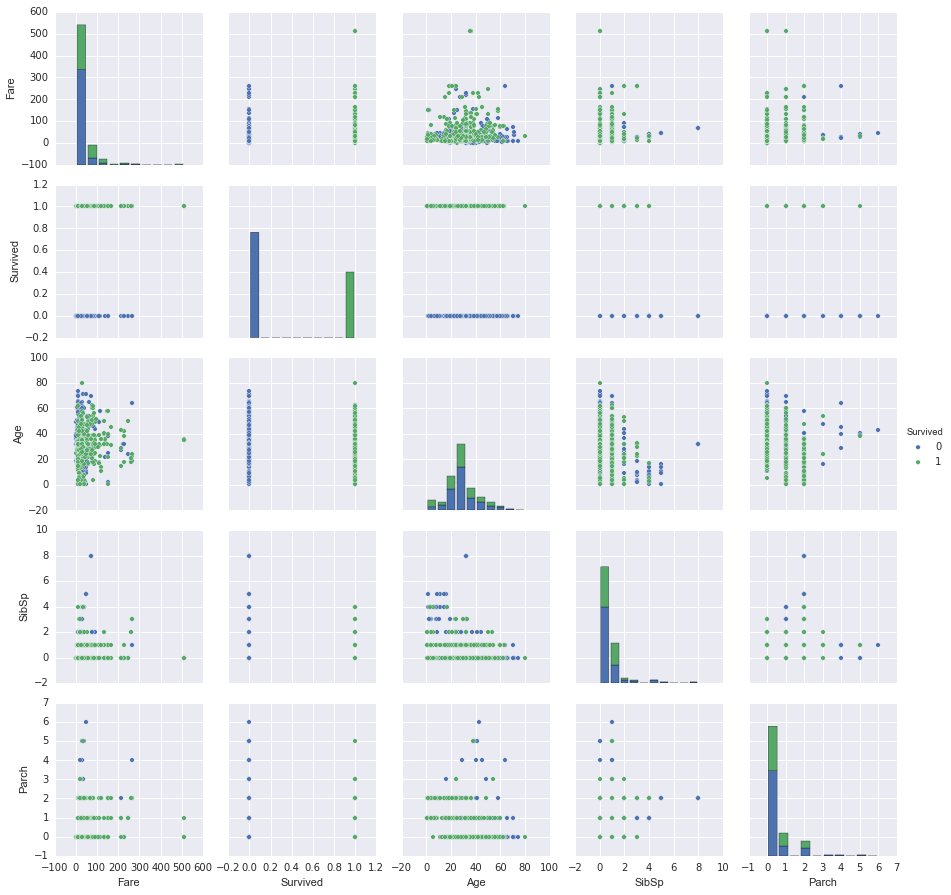

In [33]:
sns.pairplot(train[['Fare','Survived','Age','SibSp','Parch']], hue = 'Survived', dropna = True)